In [1]:
import numpy as np
import pandas as pd  # For mathematical calculations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
%matplotlib inline
import warnings  # To ignore warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('E:/Analytics Vidhya/Loan Prediction/train_ctrUa4K.csv')
test = pd.read_csv('E:/Analytics Vidhya/Loan Prediction/test_lAUu6dG.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train_original = train.copy()
test_original = test.copy()

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

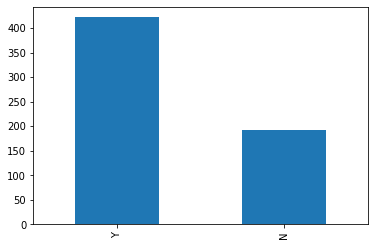

In [12]:
train['Loan_Status'].value_counts().plot.bar()

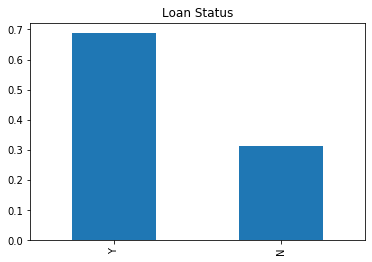

In [13]:
train['Loan_Status'].value_counts(normalize = True).plot.bar(title = 'Loan Status')

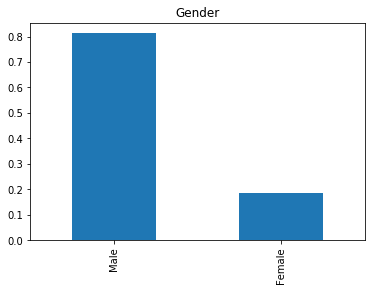

In [14]:
train['Gender'].value_counts(normalize = True).plot.bar(title = 'Gender')

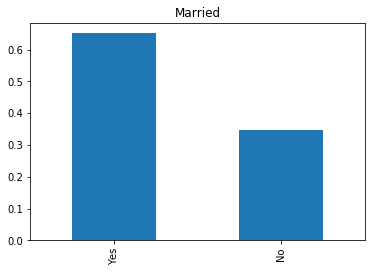

In [15]:
train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')

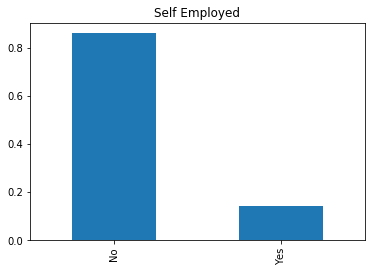

In [16]:
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self Employed')

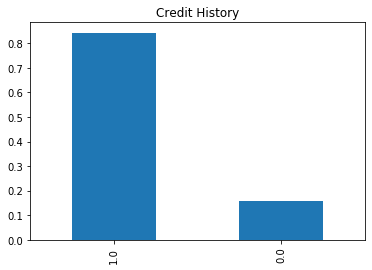

In [17]:
train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit History')

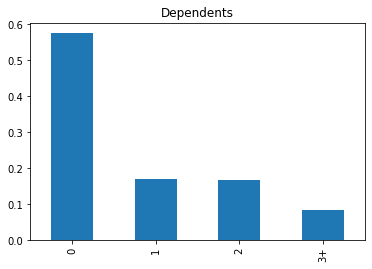

In [18]:
train['Dependents'].value_counts(normalize = True).plot.bar(title = 'Dependents')

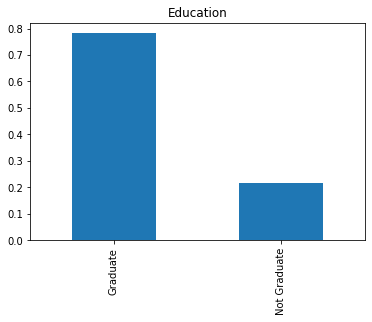

In [19]:
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')

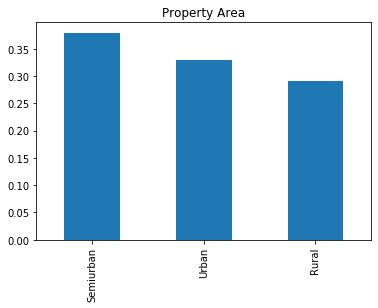

In [20]:
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property Area')

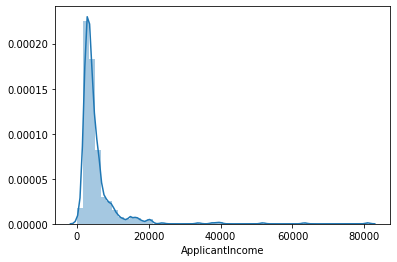

In [21]:
sns.distplot(train['ApplicantIncome'])

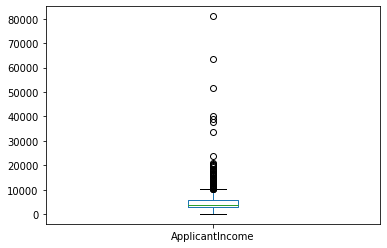

In [22]:
train['ApplicantIncome'].plot.box()

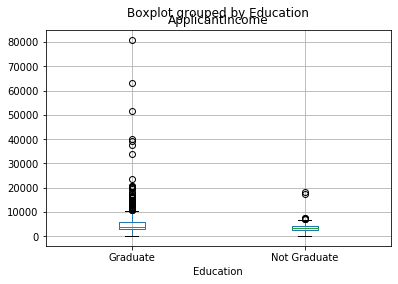

In [23]:
train.boxplot(column = 'ApplicantIncome', by = 'Education')

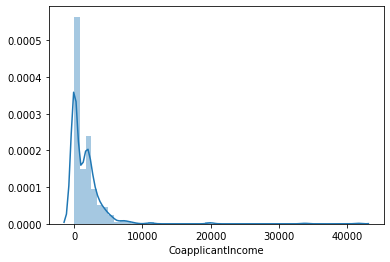

In [24]:
sns.distplot(train['CoapplicantIncome'])

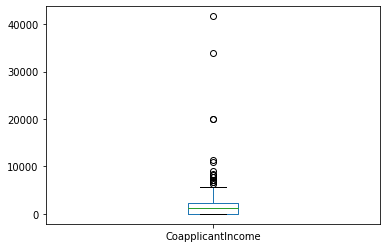

In [25]:
train['CoapplicantIncome'].plot.box()

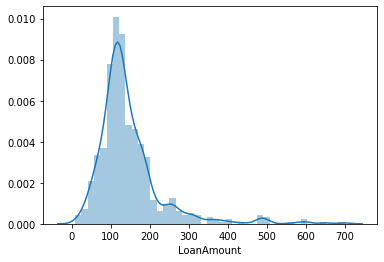

In [26]:
sns.distplot(train['LoanAmount'])

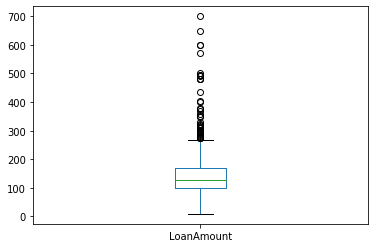

In [27]:
train['LoanAmount'].plot.box()

# Categorical Independent Variable vs Target Variable

In [28]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


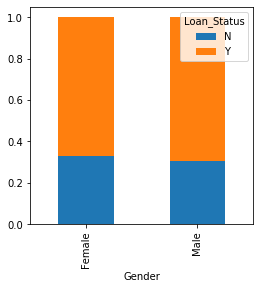

In [29]:
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

In [30]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


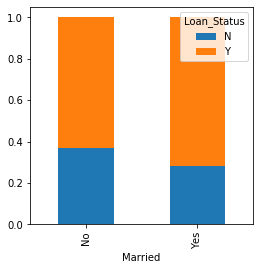

In [31]:
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

In [32]:
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


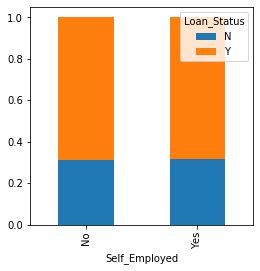

In [33]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

In [34]:
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


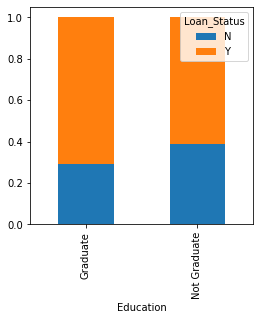

In [35]:
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

In [36]:
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


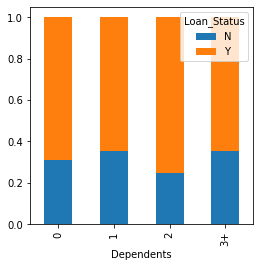

In [37]:
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

In [38]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


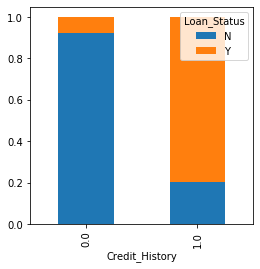

In [39]:
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

In [40]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


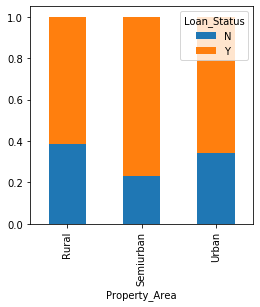

In [41]:
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

# Numerical Independent Variable vs Target Variable

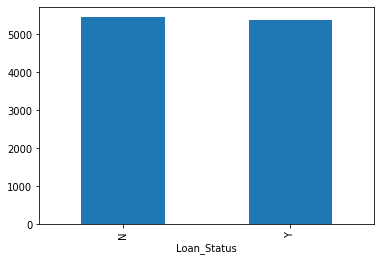

In [42]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [43]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels = group)
train['Income_bin']

0           High
1           High
2        Average
3        Average
4           High
         ...    
609      Average
610         High
611    Very High
612    Very High
613         High
Name: Income_bin, Length: 614, dtype: category
Categories (4, object): [Low < Average < High < Very High]

In [44]:
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very High,46,91


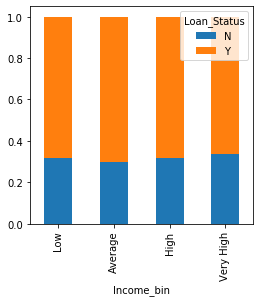

In [45]:
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

In [46]:
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels = group)

In [47]:
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin

Loan_Status,N,Y
Coapplicant_Income_bin,,
Low,3,19
Average,61,161
High,32,65


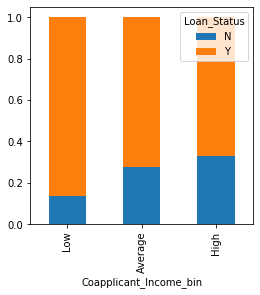

In [48]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

In [49]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [50]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels = group)

In [51]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin

Loan_Status,N,Y
Total_Income_bin,,
Low,14,10
Average,32,87
High,65,159
Very High,81,166


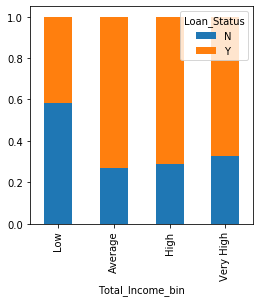

In [52]:
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

In [53]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels = group)

In [54]:
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin

Loan_Status,N,Y
LoanAmount_bin,,
Low,47,107
Average,103,255
High,31,49


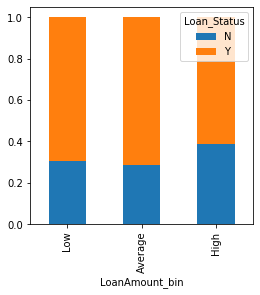

In [55]:
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

In [56]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis = 1)

In [57]:
train['Dependents'].replace('3+', 3, inplace = True)
test['Dependents'].replace('3+', 3, inplace = True)

In [58]:
train['Loan_Status'].replace('N', 0, inplace = True)
train['Loan_Status'].replace('Y', 1, inplace = True)

In [59]:
matrix = train.corr()

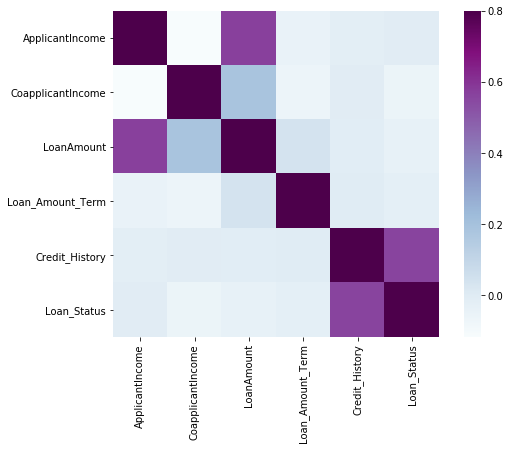

In [60]:
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix, vmax = .8, square = True, cmap = 'BuPu')

# Missing Value Imputation

In [61]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [62]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

In [63]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [64]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

In [65]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [66]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [67]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [68]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)

In [69]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Outlier Treatment

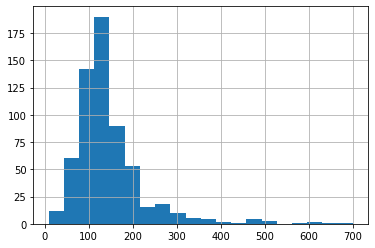

In [70]:
train['LoanAmount'].hist(bins = 20)

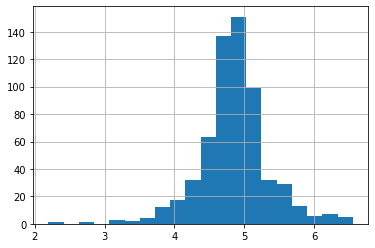

In [71]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins = 20)

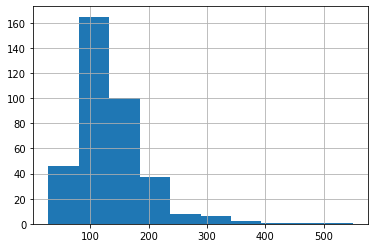

In [72]:
test['LoanAmount'].hist()

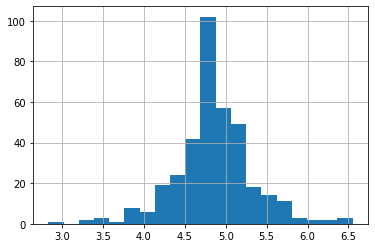

In [73]:
test['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'].hist(bins = 20)

# Model Building

In [74]:
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [75]:
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [76]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [79]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
pred_cv = model.predict(x_cv)

In [81]:
accuracy_score(y_cv, pred_cv)

0.7567567567567568

In [82]:
pred_test = model.predict(test)

In [83]:
submission = pd.read_csv('E:/Analytics Vidhya/Loan Prediction/sample_submission_49d68Cx.csv')

In [84]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [85]:
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [86]:
pd.DataFrame(submission,columns = ['Loan_ID', 'Loan_Status']).to_csv('logistic.csv', index = False)

# Logistic Regression using Stratified K-folds cross validation

In [87]:
from sklearn.model_selection import StratifiedKFold

In [88]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold{}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state = 1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+= 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score 0.8048780487804879

2 of kfold5
accuracy_score 0.8373983739837398

3 of kfold5
accuracy_score 0.7804878048780488

4 of kfold5
accuracy_score 0.7886178861788617

5 of kfold5
accuracy_score 0.7950819672131147


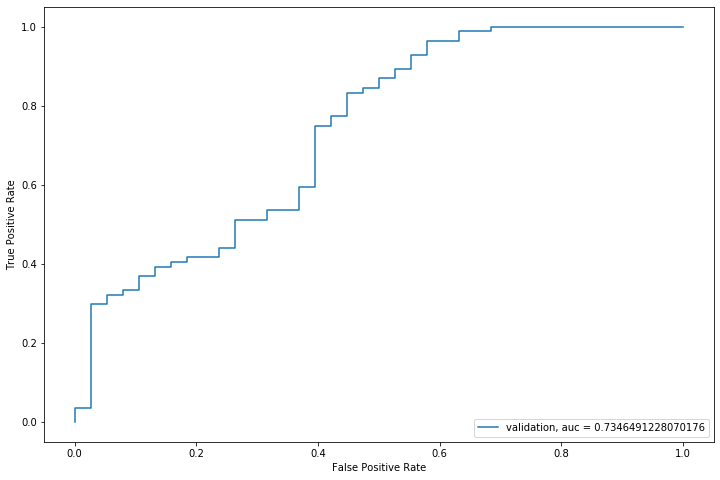

In [89]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize = (12,8))
plt.plot(fpr, tpr, label = 'validation, auc = ' +str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4)
plt.show()

In [90]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [91]:
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [92]:
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('Log.csv', index = False)

# Feature Engineering

In [93]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

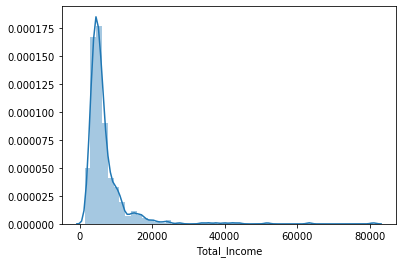

In [94]:
sns.distplot(train['Total_Income'])

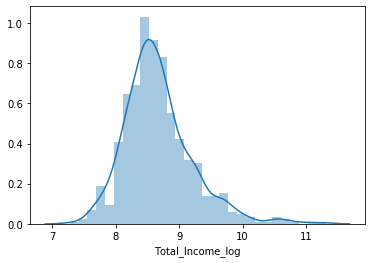

In [95]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])

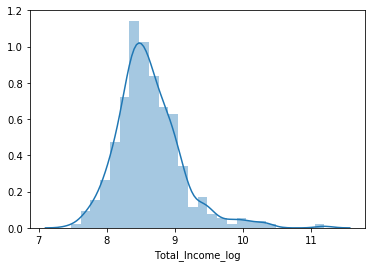

In [96]:
test['Total_Income_log'] = np.log(test['Total_Income'])
sns.distplot(test['Total_Income_log'])

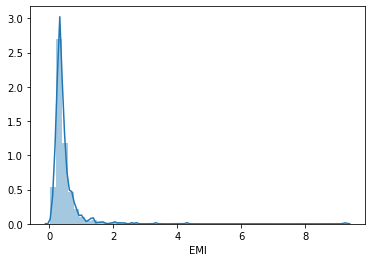

In [97]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
sns.distplot(train['EMI'])

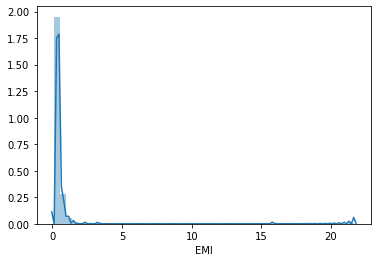

In [98]:
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(test['EMI'])

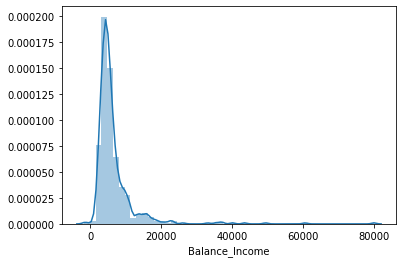

In [99]:
train['Balance_Income'] = train['Total_Income'] - (train['EMI']*1000) # Multiply with 1000 to make the units equal
sns.distplot(train['Balance_Income'])

In [100]:
test['Balance_Income'] = test['Total_Income'] - (test['EMI']*1000)

In [101]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

# Model Building II

In [102]:
X = train.drop('Loan_Status', 1)
y = train.Loan_Status  # Save target variable in separate dataset

# Logistic Regression

In [103]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold{}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state = 1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+= 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score 0.7886178861788617

2 of kfold5
accuracy_score 0.6910569105691057

3 of kfold5
accuracy_score 0.6666666666666666

4 of kfold5
accuracy_score 0.7804878048780488

5 of kfold5
accuracy_score 0.680327868852459


In [104]:
submission['Loan_Status'] = pred_test  # filling loan_status with predictions
submission['Loan_ID'] = test_original['Loan_ID']  # filling Loan_ID with test loan_ID

In [105]:
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [106]:
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('Log2.csv', index = False)

# Decision Tree

In [107]:
from sklearn import tree

In [108]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold{}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = tree.DecisionTreeClassifier(random_state = 1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+= 1
    pred_test = model.predict(test)


1 of kfold5
accuracy_score 0.7398373983739838

2 of kfold5
accuracy_score 0.6991869918699187

3 of kfold5
accuracy_score 0.7560975609756098

4 of kfold5
accuracy_score 0.7073170731707317

5 of kfold5
accuracy_score 0.6721311475409836


In [109]:
submission['Loan_Status'] = pred_test  
submission['Loan_ID'] = test_original['Loan_ID']

In [110]:
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [111]:
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('Decision Tree.csv', index = False)

# Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state = 1, max_depth = 10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+= 1
    pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377


In [114]:
from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators

paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 1), paramgrid)

In [115]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [116]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [117]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [118]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of k =fold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state = 1, max_depth = 5, n_estimators = 41)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+= 1
    pred_test = model.predict(test)
    pred2 = model.predict_proba(test)[:,1]


1 of k =fold 5
accuracy_score 0.8211382113821138

2 of k =fold 5
accuracy_score 0.8373983739837398

3 of k =fold 5
accuracy_score 0.7804878048780488

4 of k =fold 5
accuracy_score 0.7804878048780488

5 of k =fold 5
accuracy_score 0.7868852459016393


In [119]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [120]:
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [121]:
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('Random Forest.csv', index = False)

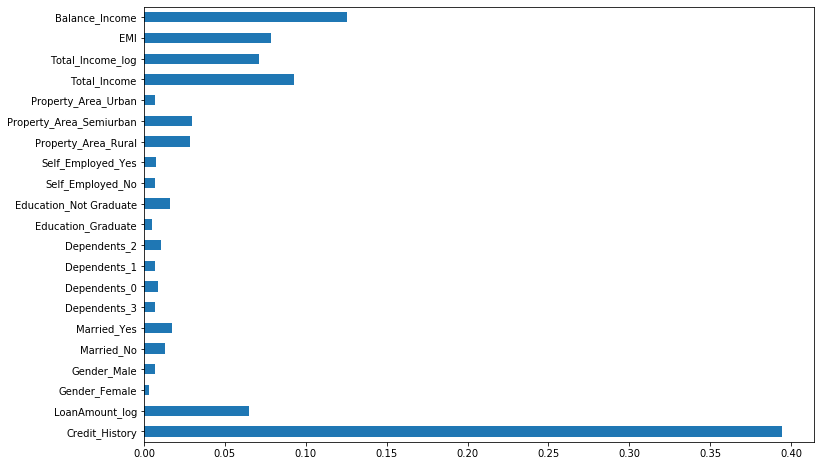

In [128]:
importances = pd.Series(model.feature_importances_, index = X.columns)
importances.plot(kind = 'barh', figsize = (12, 8 ))

# XGBOOST

In [129]:
from xgboost import XGBClassifier

In [130]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = XGBClassifier(n_estimators = 50, max_depth = 4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+= 1
    pred_test = model.predict(test)
    pred3 = model.predict_proba(test)[:,1]


1 of kfold 5
[18:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7804878048780488

2 of kfold 5
[18:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7886178861788617

3 of kfold 5
[18:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if 

In [131]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [132]:
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [135]:
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('XGBOOST.csv', index = False)